In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn import ensemble
import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('sedation_cohort.csv')

In [125]:
df.columns

Index(['subject_id', 'icustay_id', 'first_careunit', 'gender', 'expire_flag',
       'intime', 'outtime', 'age', 'height', 'weight', 'hadm_id', 'bmi',
       'bmi_groups', 'CONGESTIVE_HEART_FAILURE', 'CARDIAC_ARRHYTHMIAS',
       'VALVULAR_DISEASE', 'PULMONARY_CIRCULATION', 'PERIPHERAL_VASCULAR',
       'HYPERTENSION', 'PARALYSIS', 'OTHER_NEUROLOGICAL', 'CHRONIC_PULMONARY',
       'DIABETES_UNCOMPLICATED', 'DIABETES_COMPLICATED', 'HYPOTHYROIDISM',
       'RENAL_FAILURE', 'LIVER_DISEASE', 'PEPTIC_ULCER', 'AIDS', 'LYMPHOMA',
       'METASTATIC_CANCER', 'SOLID_TUMOR', 'RHEUMATOID_ARTHRITIS',
       'COAGULOPATHY', 'OBESITY', 'WEIGHT_LOSS', 'FLUID_ELECTROLYTE',
       'BLOOD_LOSS_ANEMIA', 'DEFICIENCY_ANEMIAS', 'ALCOHOL_ABUSE',
       'DRUG_ABUSE', 'PSYCHOSES', 'DEPRESSION', 'hour', 'Fentanyl', 'Propofol',
       'Fentanyl (Concentration)', 'Dexmedetomidine', 'vent', 'camicu',
       'rass'],
      dtype='object')

In [227]:
# select wanted features
columns = ['gender', 'age', 'bmi_groups', 'Fentanyl', 'Propofol', 
          'CONGESTIVE_HEART_FAILURE', 'CARDIAC_ARRHYTHMIAS',
       'VALVULAR_DISEASE', 'PULMONARY_CIRCULATION', 'PERIPHERAL_VASCULAR',
       'HYPERTENSION', 'PARALYSIS', 'OTHER_NEUROLOGICAL', 'CHRONIC_PULMONARY',
       'DIABETES_UNCOMPLICATED', 'DIABETES_COMPLICATED', 'HYPOTHYROIDISM',
       'RENAL_FAILURE', 'LIVER_DISEASE', 'PEPTIC_ULCER', 'AIDS', 'LYMPHOMA',
       'METASTATIC_CANCER', 'SOLID_TUMOR', 'RHEUMATOID_ARTHRITIS',
       'COAGULOPATHY', 'OBESITY', 'WEIGHT_LOSS', 'FLUID_ELECTROLYTE',
       'BLOOD_LOSS_ANEMIA', 'DEFICIENCY_ANEMIAS', 'ALCOHOL_ABUSE',
       'DRUG_ABUSE', 'PSYCHOSES', 'DEPRESSION','bmi', 'rass']
subset = df.loc[df['rass'].isna()==False, columns]

In [220]:
subset.columns

Index(['gender', 'age', 'bmi_groups', 'Fentanyl', 'Propofol',
       'CONGESTIVE_HEART_FAILURE', 'CARDIAC_ARRHYTHMIAS', 'VALVULAR_DISEASE',
       'PULMONARY_CIRCULATION', 'PERIPHERAL_VASCULAR', 'HYPERTENSION',
       'PARALYSIS', 'OTHER_NEUROLOGICAL', 'CHRONIC_PULMONARY',
       'DIABETES_UNCOMPLICATED', 'DIABETES_COMPLICATED', 'HYPOTHYROIDISM',
       'RENAL_FAILURE', 'LIVER_DISEASE', 'PEPTIC_ULCER', 'AIDS', 'LYMPHOMA',
       'METASTATIC_CANCER', 'SOLID_TUMOR', 'RHEUMATOID_ARTHRITIS',
       'COAGULOPATHY', 'OBESITY', 'WEIGHT_LOSS', 'FLUID_ELECTROLYTE',
       'BLOOD_LOSS_ANEMIA', 'DEFICIENCY_ANEMIAS', 'ALCOHOL_ABUSE',
       'DRUG_ABUSE', 'PSYCHOSES', 'DEPRESSION', 'weight', 'bmi', 'rass'],
      dtype='object')

In [128]:
subset.head(10)

,gender,age,bmi_groups,Fentanyl,Propofol,rass,CONGESTIVE_HEART_FAILURE,CARDIAC_ARRHYTHMIAS,VALVULAR_DISEASE,PULMONARY_CIRCULATION,...,COAGULOPATHY,OBESITY,WEIGHT_LOSS,FLUID_ELECTROLYTE,BLOOD_LOSS_ANEMIA,DEFICIENCY_ANEMIAS,ALCOHOL_ABUSE,DRUG_ABUSE,PSYCHOSES,DEPRESSION
4,M,66.0,Class 1 & 2 obese,0.0,63.864631,-1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,M,66.0,Class 1 & 2 obese,0.0,10.000001,-1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10,M,66.0,Class 1 & 2 obese,0.0,0.000000,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45,M,72.0,non-obese,0.0,201.892749,-5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
49,M,72.0,non-obese,0.0,116.045274,-4.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
51,M,72.0,non-obese,0.0,0.000000,-4.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
55,M,72.0,non-obese,0.0,0.000000,-2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
56,M,72.0,non-obese,0.0,0.000000,-1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
61,F,91.4,non-obese,0.0,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
75,F,91.4,non-obese,0.0,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [229]:
preprocess = make_column_transformer((OneHotEncoder(), ['bmi_groups']),
                                     sparse_threshold=0,
                                     remainder='passthrough')

x = preprocess.fit_transform(subset)

x = pd.DataFrame(x, columns=['Class 1 & 2 obese', 'Class 3 obese', 'non-obese',
                        'gender', 'age', 'Fentanyl', 'Propofol', 
          'CONGESTIVE_HEART_FAILURE', 'CARDIAC_ARRHYTHMIAS',
       'VALVULAR_DISEASE', 'PULMONARY_CIRCULATION', 'PERIPHERAL_VASCULAR',
       'HYPERTENSION', 'PARALYSIS', 'OTHER_NEUROLOGICAL', 'CHRONIC_PULMONARY',
       'DIABETES_UNCOMPLICATED', 'DIABETES_COMPLICATED', 'HYPOTHYROIDISM',
       'RENAL_FAILURE', 'LIVER_DISEASE', 'PEPTIC_ULCER', 'AIDS', 'LYMPHOMA',
       'METASTATIC_CANCER', 'SOLID_TUMOR', 'RHEUMATOID_ARTHRITIS',
       'COAGULOPATHY', 'OBESITY', 'WEIGHT_LOSS', 'FLUID_ELECTROLYTE',
       'BLOOD_LOSS_ANEMIA', 'DEFICIENCY_ANEMIAS', 'ALCOHOL_ABUSE',
       'DRUG_ABUSE', 'PSYCHOSES', 'DEPRESSION', 'bmi', 'rass'])
# gender label binarizer, male:1, female: 0
lb = LabelBinarizer()
x['gender'] = lb.fit_transform(x['gender'])

ss = MinMaxScaler()
x[['age', 'Fentanyl', 'Propofol', 'bmi']] = ss.fit_transform(x[['age', 'Fentanyl', 'Propofol', 'bmi']])

/Users/haozhang/miniconda3/envs/workspace/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [230]:
x.head(10)

,Class 1 & 2 obese,Class 3 obese,non-obese,gender,age,Fentanyl,Propofol,CONGESTIVE_HEART_FAILURE,CARDIAC_ARRHYTHMIAS,VALVULAR_DISEASE,...,WEIGHT_LOSS,FLUID_ELECTROLYTE,BLOOD_LOSS_ANEMIA,DEFICIENCY_ANEMIAS,ALCOHOL_ABUSE,DRUG_ABUSE,PSYCHOSES,DEPRESSION,bmi,rass
0,1,0,0,1,0.573980,0.0,0.063865,0,0,0,...,0,1,0,0,0,0,0,1,0.358079,-1
1,1,0,0,1,0.573980,0.0,0.010000,0,0,0,...,0,1,0,0,0,0,0,1,0.358079,-1
2,1,0,0,1,0.573980,0.0,0.000000,0,0,0,...,0,1,0,0,0,0,0,1,0.358079,0
3,0,0,1,1,0.650510,0.0,0.201893,0,0,0,...,0,1,0,0,0,0,0,0,0.281883,-5
4,0,0,1,1,0.650510,0.0,0.116045,0,0,0,...,0,1,0,0,0,0,0,0,0.281883,-4
5,0,0,1,1,0.650510,0.0,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0.281883,-4
6,0,0,1,1,0.650510,0.0,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0.281883,-2
7,0,0,1,1,0.650510,0.0,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0.281883,-1
8,0,0,1,0,0.897959,0.0,0.000000,0,1,0,...,0,0,0,0,0,0,0,1,0.120462,0
9,0,0,1,0,0.897959,0.0,0.000000,0,1,0,...,0,0,0,0,0,0,0,1,0.120462,0


In [231]:
X_train, X_test, y_train, y_test = train_test_split(x.iloc[:,:-1], x['rass'], 
                                                    test_size=0.25, random_state=100)

## Linear Regression

In [149]:
from sklearn import metrics

In [145]:
lr = linear_model.LinearRegression()
lr = lr.fit(X_train, y_train)
predict = lr.predict(X_test)

In [150]:
print(metrics.mean_squared_error(lr.predict(X_train), y_train))
print(metrics.mean_squared_error(lr.predict(X_test), y_test))

1.8938091371950154
1.9399109142524098


In [142]:
predict_stupid = np.arange(len(predict)) * 0 

In [146]:
df_lr = pd.DataFrame({'Predicted Value Stupid': predict_stupid, 'Predicted Value': predict, 'Actual': y_test.astype(int)})
df_lr['Absolute Error'] = abs(df_lr['Actual'] - df_lr['Predicted Value'])
df_lr['Absolute Error Stupid'] = abs(df_lr['Actual'] - df_lr['Predicted Value Stupid'])
df_lr

,Predicted Value Stupid,Predicted Value,Actual,Absolute Error,Absolute Error Stupid
1200,0,0.328125,0,0.328125,0
2541,0,-1.359375,-2,0.640625,2
4206,0,-2.203125,-1,1.203125,1
4166,0,-2.562500,-3,0.437500,3
1966,0,-0.484375,0,0.484375,0
4537,0,-0.812500,0,0.812500,0
688,0,-0.125000,0,0.125000,0
2603,0,-0.656250,-2,1.343750,2
134,0,-0.750000,0,0.750000,0
4269,0,-0.421875,-1,0.578125,1


In [147]:
df_lr.describe()

,Predicted Value Stupid,Predicted Value,Actual,Absolute Error,Absolute Error Stupid
count,1193.0,1193.000000,1193.000000,1193.000000,1193.000000
mean,0.0,-1.095335,-1.100587,1.055912,1.340319
std,0.0,0.798572,1.602727,0.908654,1.408219
min,0.0,-7.625000,-5.000000,0.000000,0.000000
25%,0.0,-1.390625,-2.000000,0.437500,0.000000
50%,0.0,-0.875000,-1.000000,0.812500,1.000000
75%,0.0,-0.546875,0.000000,1.421875,2.000000
max,0.0,0.390625,4.000000,6.750000,5.000000


## Gradient Boosting

In [234]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [237]:
mse_train = metrics.mean_squared_error(y_train, clf.predict(X_train))
mse_test = metrics.mean_squared_error(y_test, clf.predict(X_test))
print("MSE on train: %.4f" % float(mse_train))
print("MSE on test: %.4f" % float(mse_test))

TypeError: Expected binary or unicode string, got -3.252785590205265

In [175]:
predict = clf.predict(X_test)
predict_stupid = np.arange(len(predict)) * 0 
df_gb = pd.DataFrame({'Predicted Value Stupid': predict_stupid, 'Predicted Value': predict, 'Actual': y_test.astype(int)})
df_gb['Absolute Error'] = abs(df_gb['Actual'] - df_gb['Predicted Value'])
df_gb['Absolute Error Stupid'] = abs(df_gb['Actual'] - df_gb['Predicted Value Stupid'])
df_gb['Predicted Rounded'] = np.round(df_gb['Predicted Value'])
df_gb['Absolute Rounded'] = abs(df_gb['Actual'] - df_gb['Predicted Rounded'])
df_gb

,Predicted Value Stupid,Predicted Value,Actual,Absolute Error,Absolute Error Stupid,Predicted Rounded,Absolute Rounded
1200,0,-0.237795,0,0.237795,0,-0.0,0.0
2541,0,-1.710783,-2,0.289217,2,-2.0,0.0
4206,0,-1.659142,-1,0.659142,1,-2.0,1.0
4166,0,-3.697056,-3,0.697056,3,-4.0,1.0
1966,0,-0.201927,0,0.201927,0,-0.0,0.0
4537,0,-0.550397,0,0.550397,0,-1.0,1.0
688,0,-0.206208,0,0.206208,0,-0.0,0.0
2603,0,-0.679600,-2,1.320400,2,-1.0,1.0
134,0,-0.422109,0,0.422109,0,-0.0,0.0
4269,0,-0.239829,-1,0.760171,1,-0.0,1.0


In [188]:
df_gb.describe()

,Predicted Value Stupid,Predicted Value,Actual,Absolute Error,Absolute Error Stupid,Predicted Rounded,Absolute Rounded
count,1193.0,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,0.0,-1.078816,-1.100587,0.928603,1.340319,-1.105616,0.920369
std,0.0,0.898351,1.602727,0.837677,1.408219,0.946865,0.910157
min,0.0,-4.597685,-5.000000,0.000793,0.000000,-5.000000,0.000000
25%,0.0,-1.636723,-2.000000,0.395025,0.000000,-2.000000,0.000000
50%,0.0,-0.687259,-1.000000,0.616482,1.000000,-1.000000,1.000000
75%,0.0,-0.455853,0.000000,1.236250,2.000000,-0.000000,1.000000
max,0.0,0.576643,4.000000,5.857485,5.000000,1.000000,6.000000


Text(0, 0.5, 'Deviance')

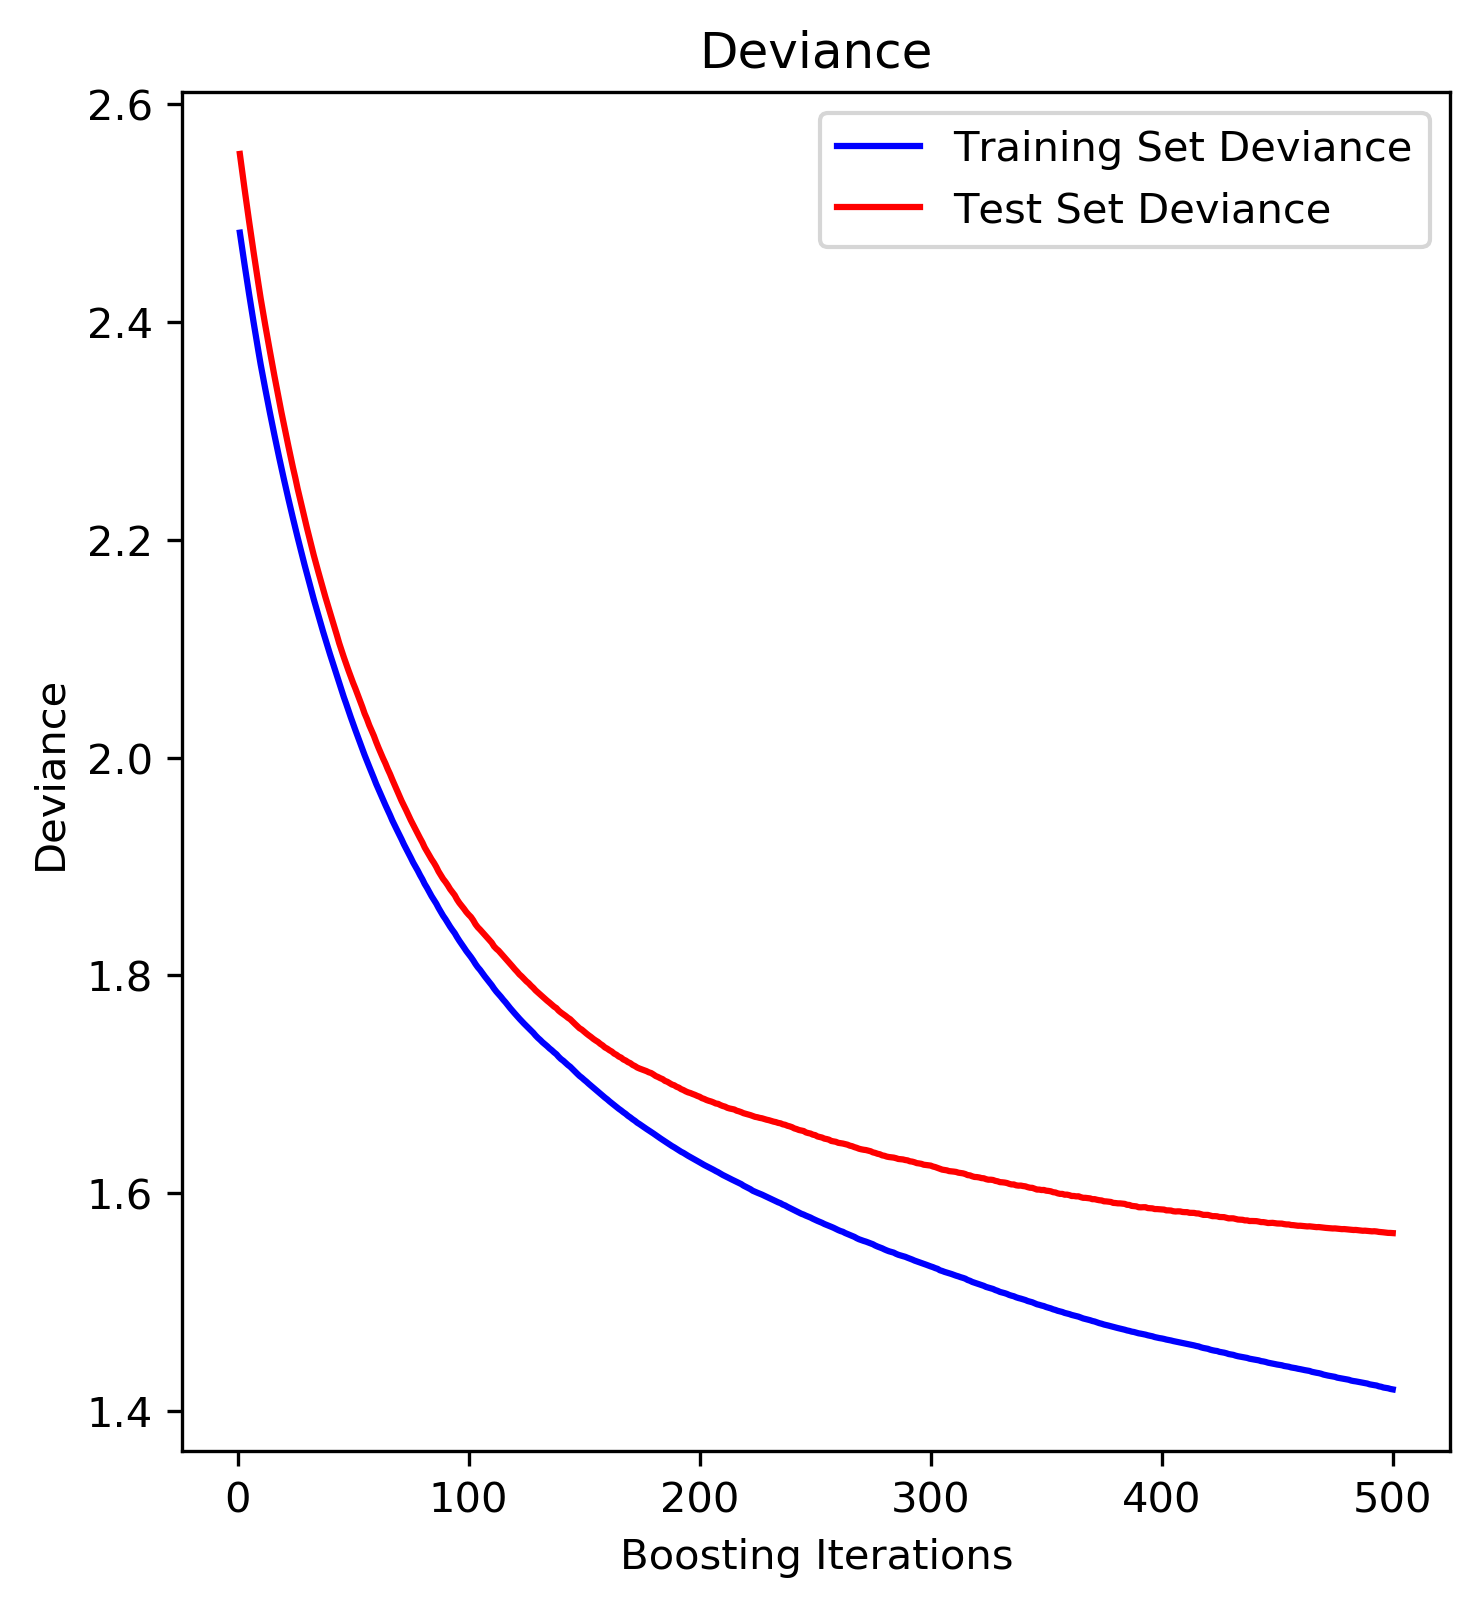

In [159]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

[3.39852579e-01 2.73928149e-01 2.32397838e-02 1.14585833e+00
 1.53202017e+01 2.54230180e+00 1.00000000e+02 4.87031762e-01
 2.07883201e+00 1.69558067e-01 1.01899595e+00 4.10094911e+00
 3.32940719e-01 2.03778770e+00 3.16917810e-01 1.82896888e-01
 1.71065922e+00 5.34442072e-01 1.71847400e+00 2.71191940e+00
 1.63545858e+00 2.75778724e-01 0.00000000e+00 1.03738632e+00
 1.15753143e+00 6.58580960e+00 2.24830625e-01 3.59726860e+00
 1.77575992e+00 1.70985503e+00 1.10902720e+00 1.76273562e+00
 7.70973412e-02 6.86668691e+00 7.57366216e-01 7.42658241e-01
 2.66127403e+00 2.18511827e+01]
[22  2 32  9 15 26  1 21 14 12  0  7 17 35 34 10 23 30  3 24 20 29 16 18
 31 28 13  8  5 36 19 27 11 25 33  4 37  6]


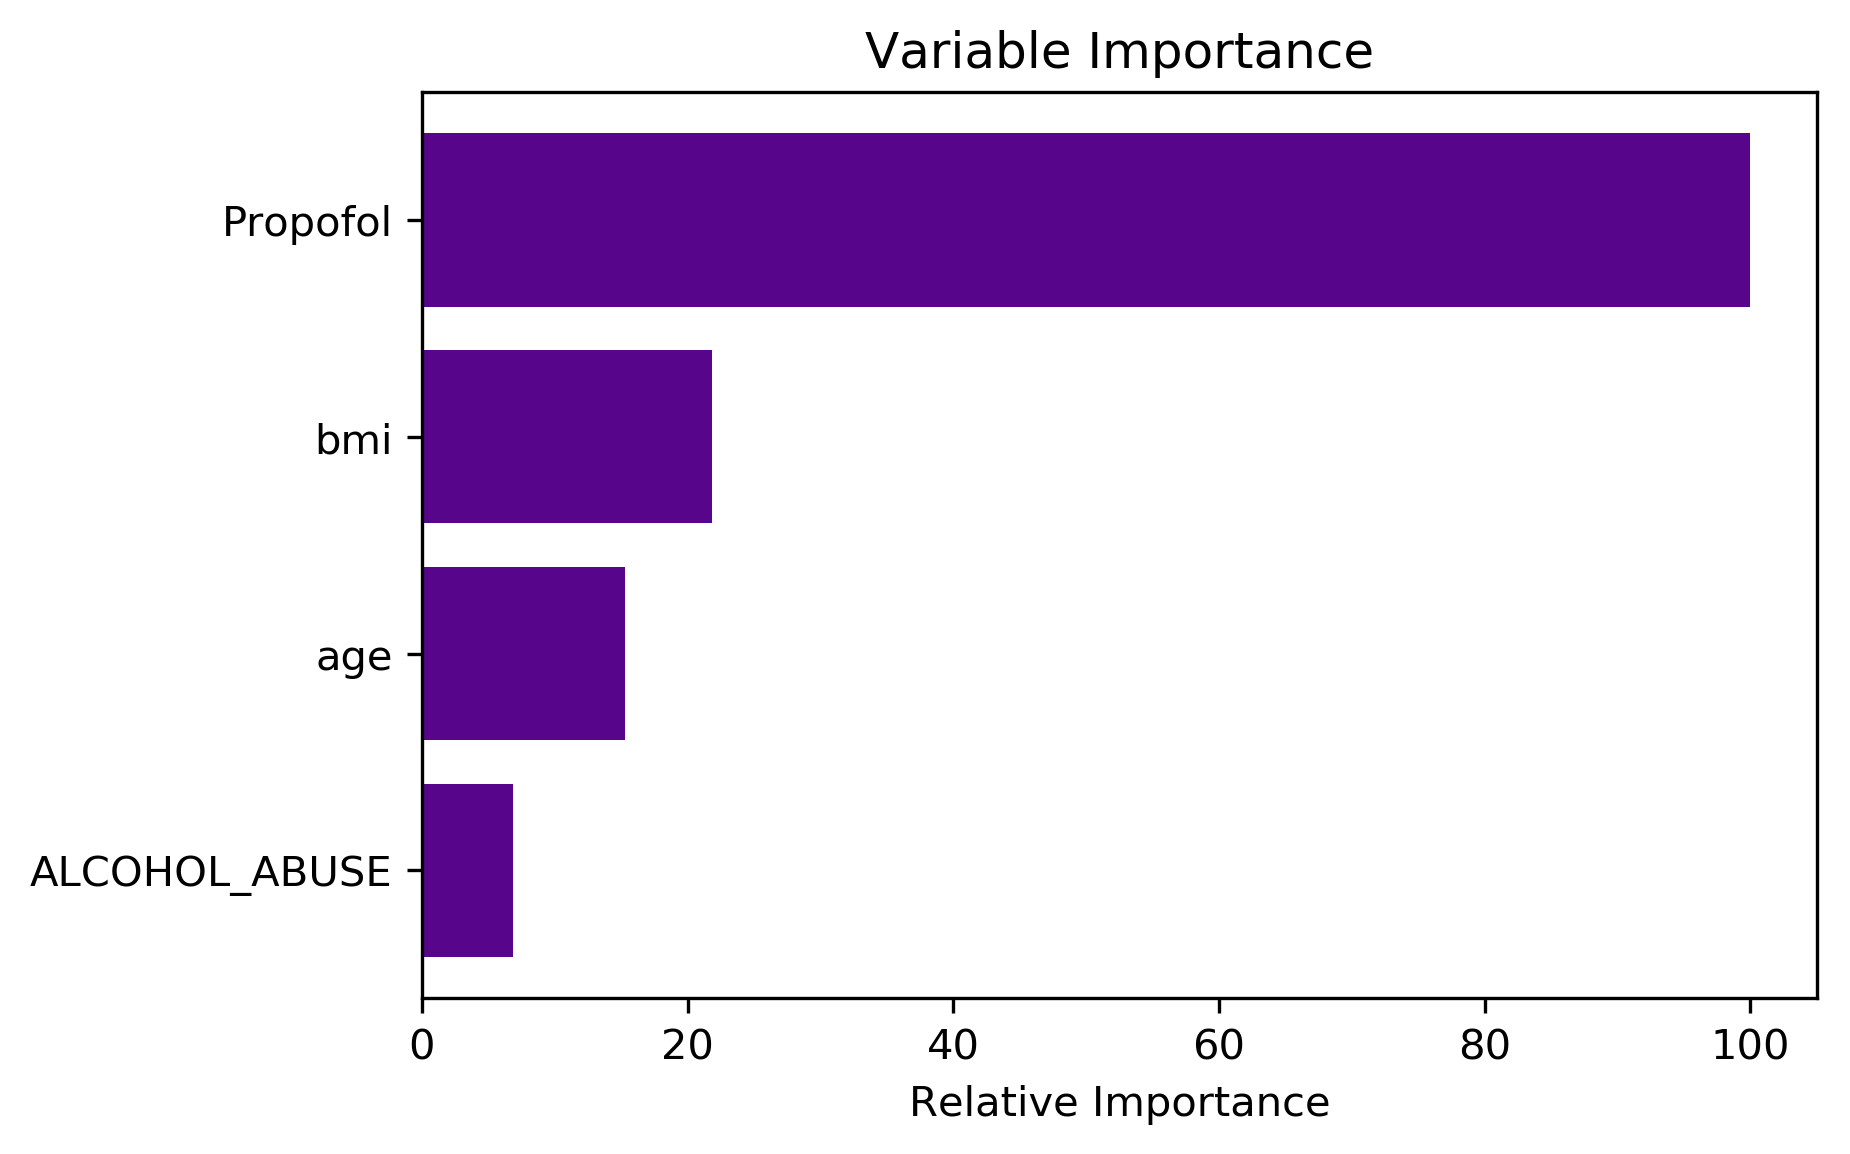

In [236]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
print(sorted_idx)
sorted_idx = sorted_idx[-4:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#57068c')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [197]:
feature_importance[sorted_idx]

array([  3.54079128,   5.49608299,   7.05641006,   8.06363835,
        17.84678846, 100.        ])

In [196]:
"""Importing Libraries"""
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import metrics
from keras.optimizers import Adam, SGD

"""Creating Model Architecture"""
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=300))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(rate=0.15))
model.add(Dense(units=1, activation='softmax'))

"""Compileing ANN"""
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=1e-3),
              metrics=[metrics.binary_accuracy,
                       metrics.binary_crossentropy])

"""Saving Best Weights"""
checkpoint = ModelCheckpoint('ANN_weights_{}.best.hdf5'.format('mimic'),
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min',
                             save_weights_only=True)

"""Determining if early stopping will be utilized"""
if type(10) is int:
    early = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=10)
    callbacks_list = [checkpoint, early]
else:
    callbacks_list = [checkpoint]

ann_history = model.fit(x=X_train,
                        y=y_train.values,
                        validation_split=0.20,
                        batch_size=32,
                        epochs=100,
                        callbacks=callbacks_list,
                        verbose=1)

Train on 2860 samples, validate on 716 samples
Epoch 1/100
2860/2860 [==============================] - 6s 2ms/step - loss: 6.5843 - binary_accuracy: 0.0829 - binary_crossentropy: 32.2917 - val_loss: 6.8701 - val_binary_accuracy: 0.0978 - val_binary_crossentropy: 33.1094

Epoch 00001: val_loss improved from inf to 6.87011, saving model to ANN_weights_mimic.best.hdf5
Epoch 2/100
2860/2860 [==============================] - 2s 752us/step - loss: 6.5843 - binary_accuracy: 0.0829 - binary_crossentropy: 32.2917 - val_loss: 6.8701 - val_binary_accuracy: 0.0978 - val_binary_crossentropy: 33.1094

Epoch 00002: val_loss did not improve from 6.87011
Epoch 3/100
2860/2860 [==============================] - 2s 745us/step - loss: 6.5843 - binary_accuracy: 0.0829 - binary_crossentropy: 32.2917 - val_loss: 6.8701 - val_binary_accuracy: 0.0978 - val_binary_crossentropy: 33.1094

Epoch 00003: val_loss did not improve from 6.87011
Epoch 4/100
2860/2860 [==============================] - 2s 797us/step - 

In [ ]:
from sklearn import metrics
metrics